In [1]:
import warnings
warnings.filterwarnings("ignore")

# Load raw data

In [2]:
import pandas as pd
df = pd.read_csv("dataset.csv" , index_col = 0)
df["date"] = pd.to_datetime(df["date"])
df.sort_values(["crypto_name" , "date"]).reset_index(drop = True)
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [3]:
df.shape

(72946, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         72946 non-null  float64       
 1   high         72946 non-null  float64       
 2   low          72946 non-null  float64       
 3   close        72946 non-null  float64       
 4   volume       72946 non-null  float64       
 5   marketCap    72946 non-null  float64       
 6   timestamp    72946 non-null  object        
 7   crypto_name  72946 non-null  object        
 8   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 5.6+ MB


In [5]:
df.isna().sum()

open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

# Feature Engineering

In [6]:
df["crypto_name"].unique()

array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
       'Tether', 'Ethereum', 'Ethereum Classic', 'Maker',
       'Basic Attention Token', 'EOS', 'Bitcoin Cash', 'BNB', 'TRON',
       'Decentraland', 'Chainlink', 'Cardano', 'Filecoin',
       'Theta Network', 'Huobi Token', 'Ravencoin', 'Tezos', 'VeChain',
       'Quant', 'USD Coin', 'Cronos', 'Wrapped Bitcoin', 'Cosmos',
       'Polygon', 'OKB', 'UNUS SED LEO', 'Algorand', 'Chiliz',
       'THORChain', 'Terra Classic', 'FTX Token', 'Hedera', 'Binance USD',
       'Dai', 'Solana', 'Avalanche', 'Shiba Inu', 'The Sandbox',
       'Polkadot', 'Elrond', 'Uniswap', 'Aave', 'NEAR Protocol', 'Flow',
       'Internet Computer', 'Casper', 'Toncoin', 'Chain', 'ApeCoin',
       'Aptos'], dtype=object)

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
open,72946.0,870.194495,0.0,0.167916,1.630666,26.070557,67549.735581,5231.65447
high,72946.0,896.412386,0.0,0.1768,1.717542,27.568677,162188.255437,5398.612632
low,72946.0,844.06064,0.0,0.15863,1.541486,24.791776,66458.723733,5079.389387
close,72946.0,871.294862,0.0,0.168298,1.640219,26.251951,67566.830088,5235.508138
volume,72946.0,2207607310.505649,0.0,8320617.589204,109875645.955259,669139847.401324,350967941479.059998,9617884904.434078
marketCap,72946.0,14749221288.694319,0.0,186043250.0,1268539252.57233,5118618335.975495,1274831490851.01001,75011591365.807358
date,72946,2019-10-13 03:20:59.945713152,2013-05-05 00:00:00,2018-09-08 00:00:00,2020-03-17 00:00:00,2021-05-02 00:00:00,2022-10-23 00:00:00,NaN


In [8]:
import numpy as np
df['return'] = df.groupby('crypto_name')['close'].pct_change()

In [9]:
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,NaN
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,NaN
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124
...,...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23,-0.005835
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23,0.013369
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23,-0.006963
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23,-0.091161


In [10]:
df["log_return"] = np.log(df["close"]) - np.log(df.groupby("crypto_name")["close"].shift(1))

In [11]:
df

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,log_return
0,112.900002,118.800003,107.142998,115.910004,0.000000e+00,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,NaN,NaN
1,3.493130,3.692460,3.346060,3.590890,0.000000e+00,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,NaN,NaN
2,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,-0.031640
3,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,-0.063116
4,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,-0.007149
...,...,...,...,...,...,...,...,...,...,...,...
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23,-0.005835,-0.005852
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23,0.013369,0.013281
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23,-0.006963,-0.006987
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23,-0.091161,-0.095587


In [12]:
# Moving averages
for w in [7, 14, 30]:
    df[f"ma_{w}"] = (
        df.groupby("crypto_name")["close"]
          .transform(lambda x: x.rolling(window=w, min_periods=1).mean())
    )

In [13]:
df["Rolling_vol_7"] = df.groupby("crypto_name")["close"].transform(lambda x: x.rolling(window=7, min_periods=1).std())
          

In [14]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,log_return,ma_7,ma_14,ma_30,Rolling_vol_7
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,NaN,NaN,115.910004,115.910004,115.910004,NaN
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,NaN,NaN,3.590890,3.590890,3.590890,NaN
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,-0.031640,114.105003,114.105003,114.105003,2.552656
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,-0.063116,3.481070,3.481070,3.481070,0.155309
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,-0.007149,113.236669,113.236669,113.236669,2.349477


In [15]:
#Boolinger_Band
df["ma_20"] = df.groupby("crypto_name")["close"].transform(lambda x: x.rolling(window=20, min_periods=1).mean())
df["std_20"] = df["ma_20"] = df.groupby("crypto_name")["close"].transform(lambda x: x.rolling(window=20, min_periods=1).std())
df["bb_upper"] = df["ma_20"] + 2*df["std_20"]
df["bb_lower"] = df["ma_20"] - 2*df["std_20"]
df["bb_width"] = df["bb_upper"] - df["bb_lower"]

In [16]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,log_return,ma_7,ma_14,ma_30,Rolling_vol_7,ma_20,std_20,bb_upper,bb_lower,bb_width
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,NaN,NaN,115.910004,115.910004,115.910004,NaN,NaN,NaN,NaN,NaN,NaN
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,NaN,NaN,3.590890,3.590890,3.590890,NaN,NaN,NaN,NaN,NaN,NaN
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,-0.031640,114.105003,114.105003,114.105003,2.552656,2.552656,2.552656,7.657968,-2.552656,10.210624
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,-0.063116,3.481070,3.481070,3.481070,0.155309,0.155309,0.155309,0.465927,-0.155309,0.621236
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,-0.007149,113.236669,113.236669,113.236669,2.349477,2.349477,2.349477,7.048430,-2.349477,9.397906


In [17]:
#Average True Range(ATR)
def true_range(group):
    high = group["high"]
    low = group["low"]
    prev_close = group["close"].shift(1)
    tr = pd.concat([high - low, (high - prev_close).abs(), (low - prev_close).abs()], axis=1).max(axis=1)
    return tr

In [18]:
df["tr"] = df.groupby("crypto_name").apply(true_range).reset_index(level = 0 , drop = True)
for w in [7,14,30]:
    df[f'atr_{w}'] = df.groupby('crypto_name')['tr'].transform(lambda x: x.rolling(window=w, min_periods=1).mean())

In [19]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,...,Rolling_vol_7,ma_20,std_20,bb_upper,bb_lower,bb_width,tr,atr_7,atr_14,atr_30
0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.657005,11.657005,11.657005,11.657005
1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.346400,0.346400,0.346400,0.346400
2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,...,2.552656,2.552656,2.552656,7.657968,-2.552656,10.210624,18.023003,14.840004,14.840004,14.840004
3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,...,0.155309,0.155309,0.155309,0.465927,-0.155309,0.621236,0.665000,0.505700,0.505700,0.505700
4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,...,2.349477,2.349477,2.349477,7.048430,-2.349477,9.397906,15.744003,15.141337,15.141337,15.141337


In [20]:
# Liquidity ratio
df['liq_ratio'] = df['volume'] / (df['marketCap'] + 1e-9)

In [21]:
df = df.dropna(subset=['Rolling_vol_7']).reset_index(drop=True)

In [22]:
print('Data shape after feature engineering:', df.shape)

Data shape after feature engineering: (72890, 25)


In [23]:
df.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,return,...,ma_20,std_20,bb_upper,bb_lower,bb_width,tr,atr_7,atr_14,atr_30,liq_ratio
0,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031145,...,2.552656,2.552656,7.657968,-2.552656,10.210624,18.023003,14.840004,14.840004,14.840004,0.0
1,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.061166,...,0.155309,0.155309,0.465927,-0.155309,0.621236,0.665000,0.505700,0.505700,0.505700,0.0
2,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007124,...,2.349477,2.349477,7.048430,-2.349477,9.397906,15.744003,15.141337,15.141337,15.141337,0.0
3,3.370870,3.406720,2.939790,3.332740,0.0,5.805127e+07,2013-05-07T23:59:59.999Z,Litecoin,2013-05-07,-0.011423,...,0.139264,0.139264,0.417791,-0.139264,0.557054,0.466930,0.492777,0.492777,0.492777,0.0
4,3.283620,3.491120,3.283620,3.409240,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,Litecoin,2013-05-08,0.022954,...,0.114258,0.114258,0.342774,-0.114258,0.457031,0.207500,0.421457,0.421457,0.421457,0.0


In [24]:
df.duplicated().sum()

0

In [25]:
import matplotlib.pyplot as plt

In [26]:
corr = df.select_dtypes(include = "number").corr()
corr_target = corr["Rolling_vol_7"].sort_values(ascending = False)
corr_target.head(10)                   

Rolling_vol_7    1.000000
bb_width         0.884255
std_20           0.884255
ma_20            0.884255
bb_upper         0.884255
ma_7             0.881171
ma_14            0.880850
ma_30            0.878918
high             0.878113
open             0.877494
Name: Rolling_vol_7, dtype: float64

In [27]:
df['bb_overbought'] = df['close'] > df['bb_upper']
df['bb_oversold']  = df['close'] < df['bb_lower']

# Visualisation

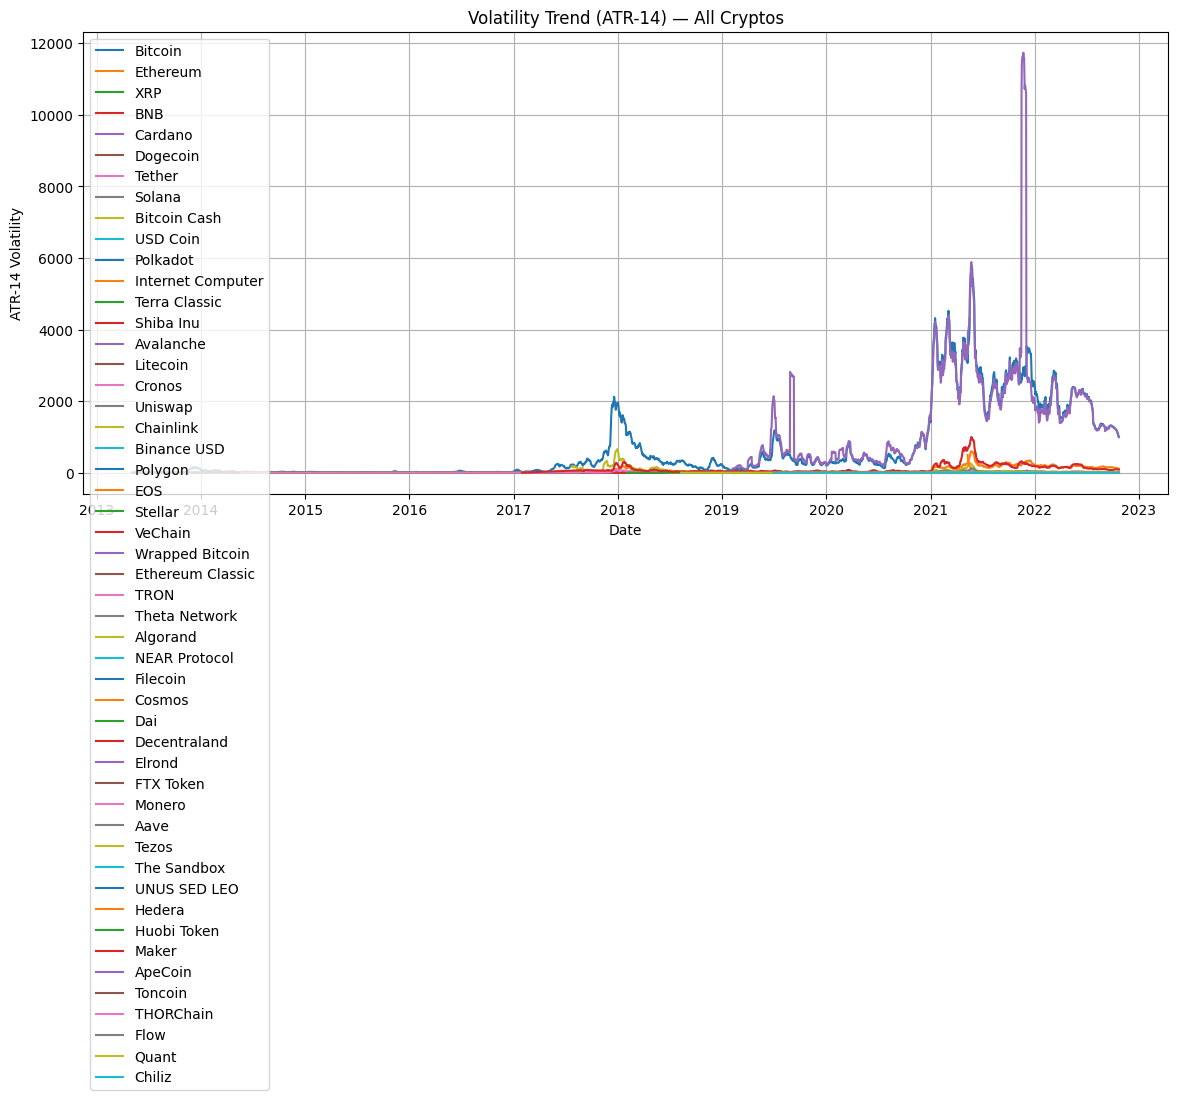

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

# cryptos by market cap
All_crypto = df.sort_values("marketCap", ascending=False).drop_duplicates("crypto_name").head(50)
All_crypto_names = All_crypto['crypto_name'].tolist()

plt.figure(figsize=(14,6))

for crypto in All_crypto_names:
    dfc = df[df['crypto_name'] == crypto].sort_values("date")
    plt.plot(dfc['date'], dfc['atr_14'], label=crypto)

plt.title("Volatility Trend (ATR-14) — All Cryptos")
plt.xlabel("Date")
plt.ylabel("ATR-14 Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Insights

The all-crypto volatility plot reveals that only a handful of cryptos—mainly BTC, ETH, SOL, MKR, ETC, WBTC—drive almost all volatility in the market.

Most cryptocurrencies show near-zero volatility, meaning they are not influential in market instability.

The Top-10 plot(Below) emphasized the leaders, while the new full-market plot highlights how rare true volatility actually is across the entire crypto space.

Market cycles (2018, 2021) still cause synchronized bumps across all coins, but only a few show major spikes.

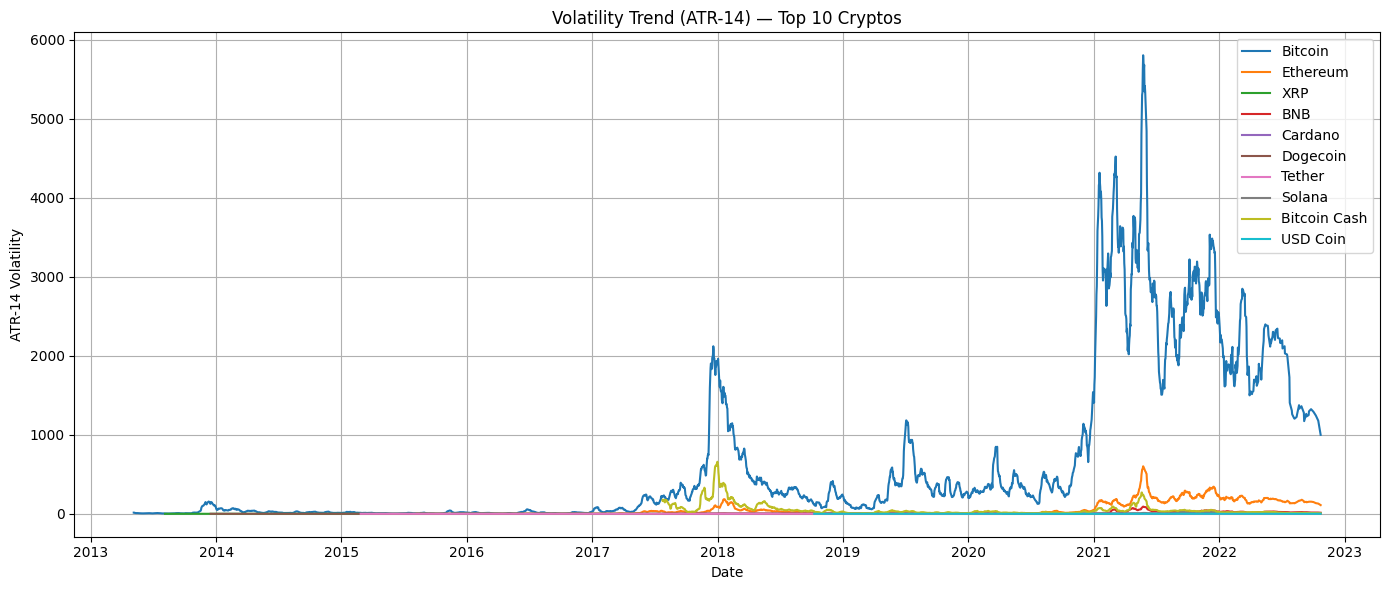

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'])

# Top 5 cryptos by market cap
top10 = df.sort_values("marketCap", ascending=False).drop_duplicates("crypto_name").head(10)
top10_names = top10['crypto_name'].tolist()

plt.figure(figsize=(14,6))

for crypto in top10_names:
    dfc = df[df['crypto_name'] == crypto].sort_values("date")
    plt.plot(dfc['date'], dfc['atr_14'], label=crypto)

plt.title("Volatility Trend (ATR-14) — Top 10 Cryptos")
plt.xlabel("Date")
plt.ylabel("ATR-14 Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights
1-- The cryptocurrencies included in the plot
(Bitcoin, Ethereum, XRP, BNB, Cardano, Dogecoin, Tether, Solana, Bitcoin Cash, USD Coin)
represent the Top-10 by Market Cap.



2-- Bitcoin has the highest volatility among all coins

Its volatility peaks (~5000–6000 ATR) are far above every other crypto

Major volatility spikes occur during:

2017–18 bull run

2020–21 bull run

👉 Bitcoin is the primary driver of volatility in the entire crypto market.


3-- Ethereum’s volatility is dynamic:

• In 2018:

ETH was only the 3rd–4th most volatile coin.
Bitcoin Cash and a few altcoins were more volatile than ETH at that time.

• In 2021:

ETH volatility increased significantly and became the 2nd most volatile crypto after Bitcoin.

This means:

Ethereum’s volatility depends heavily on market events

During the 2021 DeFi + NFT boom, ETH volatility surged

👉 Ethereum’s volatility is event-driven and time-dependent.


4-- Coins like:XRP , BNB , Cardano , Dogecoin , Solana

and stablecoins like: USDT , USDC all show very low ATR-14 values


This means: Their daily price fluctuations are smaller.

They are much more stable compared to BTC and ETH

Stablecoins naturally show near-zero volatility

👉 These coins belong to the low-volatility cluster.

5-- 👉 In crypto, volatility is driven more by hype cycles, liquidity shocks, and market sentiment — not by market cap.

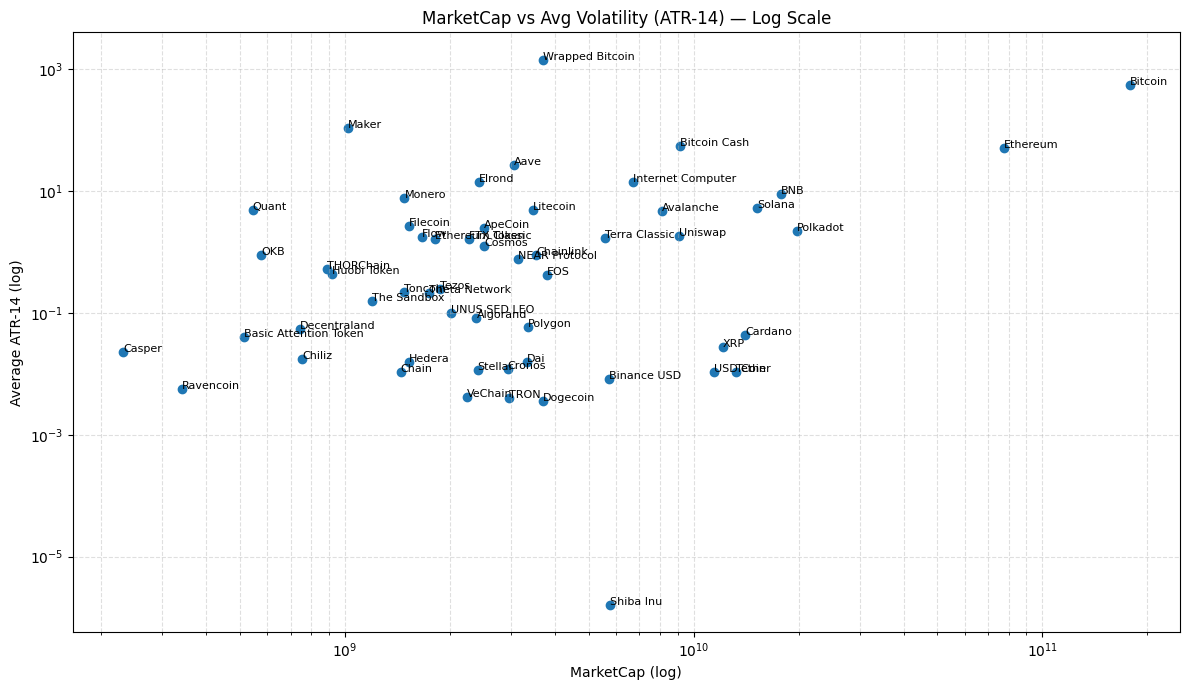

In [30]:
import matplotlib.pyplot as plt
atr_data = df.groupby("crypto_name").agg({
    "marketCap": "mean",
    "atr_14": "mean"
}).reset_index()

plt.figure(figsize=(12,7))

plt.scatter(atr_data["marketCap"], atr_data["atr_14"])

for i in range(len(atr_data)):
    plt.text(atr_data["marketCap"][i], 
             atr_data["atr_14"][i], 
             atr_data["crypto_name"][i], fontsize=8)

plt.xscale("log")
plt.yscale("log")

plt.title("MarketCap vs Avg Volatility (ATR-14) — Log Scale")
plt.xlabel("MarketCap (log)")
plt.ylabel("Average ATR-14 (log)")
plt.grid(True, which="both", ls="--", alpha=0.4)

plt.tight_layout()
plt.show()


## Insights
1- Volatility in crypto does NOT follow traditional finance logic.
It is not inversely proportional to market cap.( Even high market cap cryptos are highly volatile)

2- This confirms that major market movements are driven by BTC-related assets.

3- This indicates that Ethereum behaves more like a high-beta asset, highly responsive to market cycles

4- USDT , USDC , DAI High market cap but Extremely low ATR-14

This confirms stablecoins are designed to be volatility-free assets, regardless of market conditions.

5- Dogecoin and Shiba Inu show High Market_cap but Very low average ATR-14

Meme coins are event-driven, not consistently volatile.

6- Marker , Aave , Elrond and Monero These assets behave more like high-risk/high-return speculative tokens despite moderate market cap.

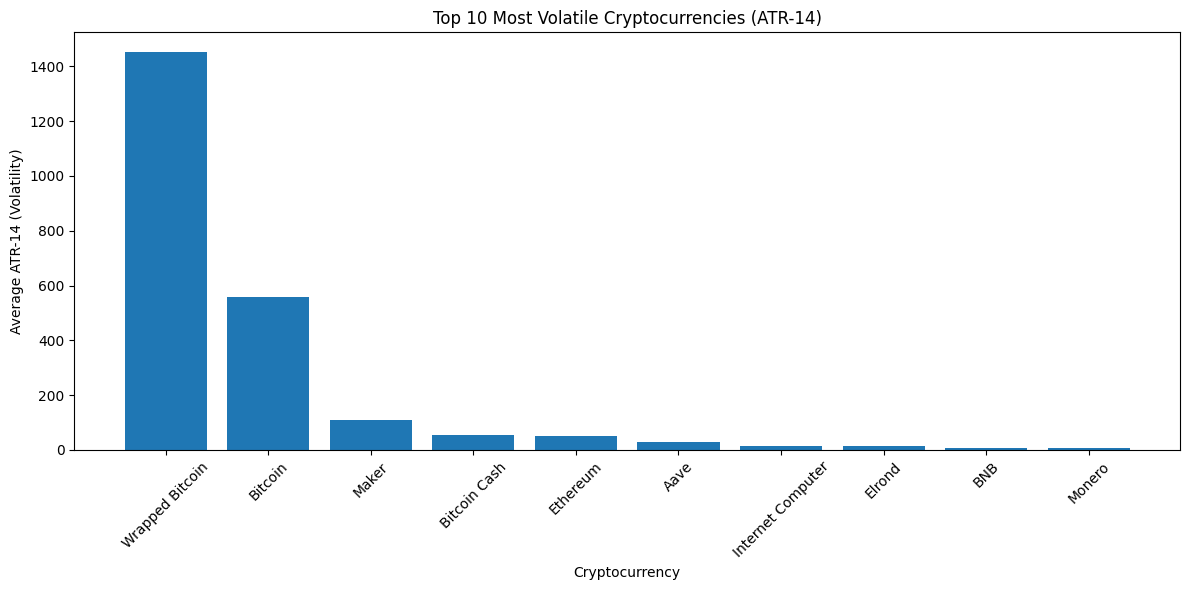

<Figure size 640x480 with 0 Axes>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by crypto and calculate average ATR-14
avg_atr = (
    df.groupby('crypto_name')['atr_14']
    .mean()
    .sort_values(ascending=False).drop_duplicates() 
    .head(10)                     # ← Only Top 10
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
plt.bar(avg_atr['crypto_name'], avg_atr['atr_14'])
plt.xticks(rotation=45)
plt.xlabel("Cryptocurrency")
plt.ylabel("Average ATR-14 (Volatility)")
plt.title("Top 10 Most Volatile Cryptocurrencies (ATR-14)")
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


In [32]:
# Top 10 Most Volatile Cryptocurrencies Table
top10 = (
    df.groupby('crypto_name')['atr_14']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(top10)


         crypto_name       atr_14
0    Wrapped Bitcoin  1451.333915
1            Bitcoin   557.235042
2              Maker   110.127392
3       Bitcoin Cash    54.615305
4           Ethereum    51.291666
5               Aave    27.377153
6  Internet Computer    14.166773
7             Elrond    14.105018
8                BNB     8.860079
9             Monero     7.685952


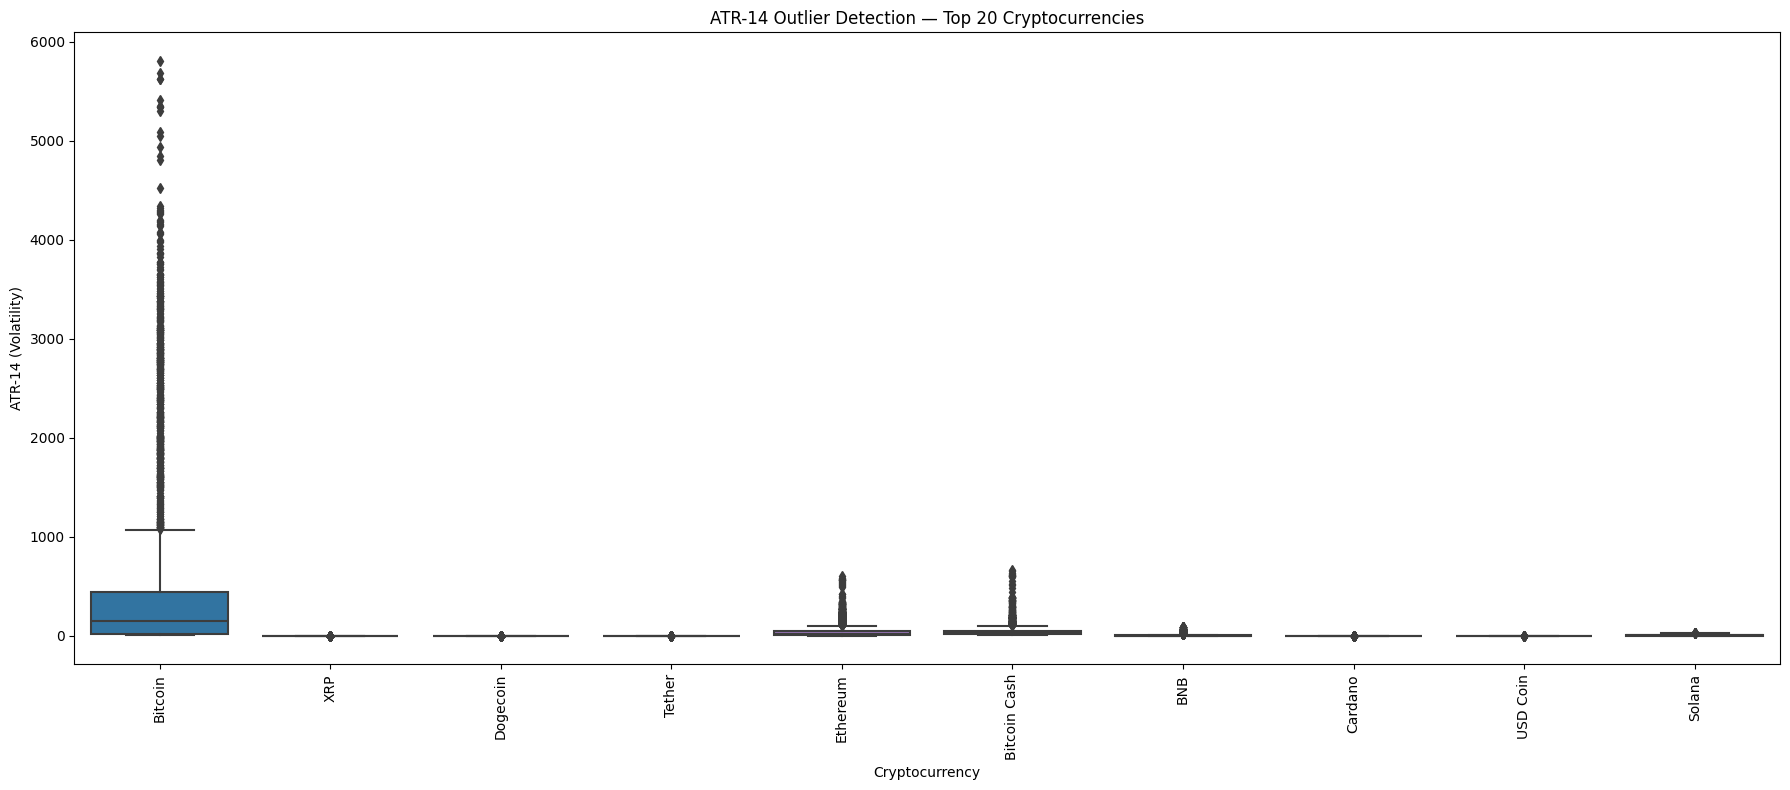

In [33]:
# Select top 20 cryptos by MarketCap (you can increase number)
import seaborn as sns
top_n = df.sort_values("marketCap", ascending=False).drop_duplicates("crypto_name").head(10)
top_names = top_n['crypto_name']

plt.figure(figsize=(18, 8))
sns.boxplot(data=df[df['crypto_name'].isin(top_names)], x='crypto_name', y='atr_14')
plt.xticks(rotation=90)
plt.title("ATR-14 Outlier Detection — Top 20 Cryptocurrencies")
plt.xlabel("Cryptocurrency")
plt.ylabel("ATR-14 (Volatility)")
plt.tight_layout()
plt.show()

# Feature selection

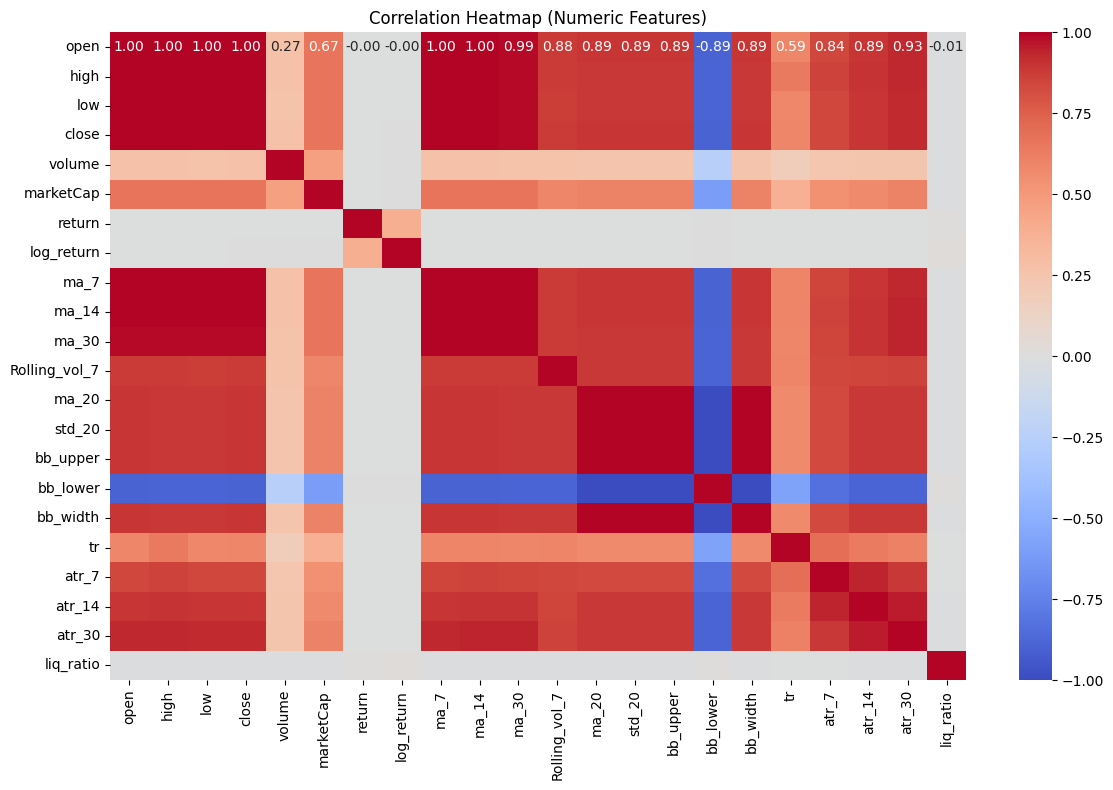

In [34]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = num_df.corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.tight_layout()
plt.show()


In [35]:
# Drop redundant / highly correlated features
redundant_features = [
    'ma_7', 'ma_20',                # redundant moving averages
    'atr_7', 'atr_30',              # redundant ATR windows
    'bb_upper', 'bb_lower',         # band positions, redundant with width
    'return'                        # optional (keep log_return instead)
]

df_reduced = df.drop(columns=[col for col in redundant_features if col in df.columns])

print("Remaining features:\n", df_reduced.columns)
print("Shape after dropping:", df_reduced.shape)

Remaining features:
 Index(['open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp',
       'crypto_name', 'date', 'log_return', 'ma_14', 'ma_30', 'Rolling_vol_7',
       'std_20', 'bb_width', 'tr', 'atr_14', 'liq_ratio', 'bb_overbought',
       'bb_oversold'],
      dtype='object')
Shape after dropping: (72890, 20)


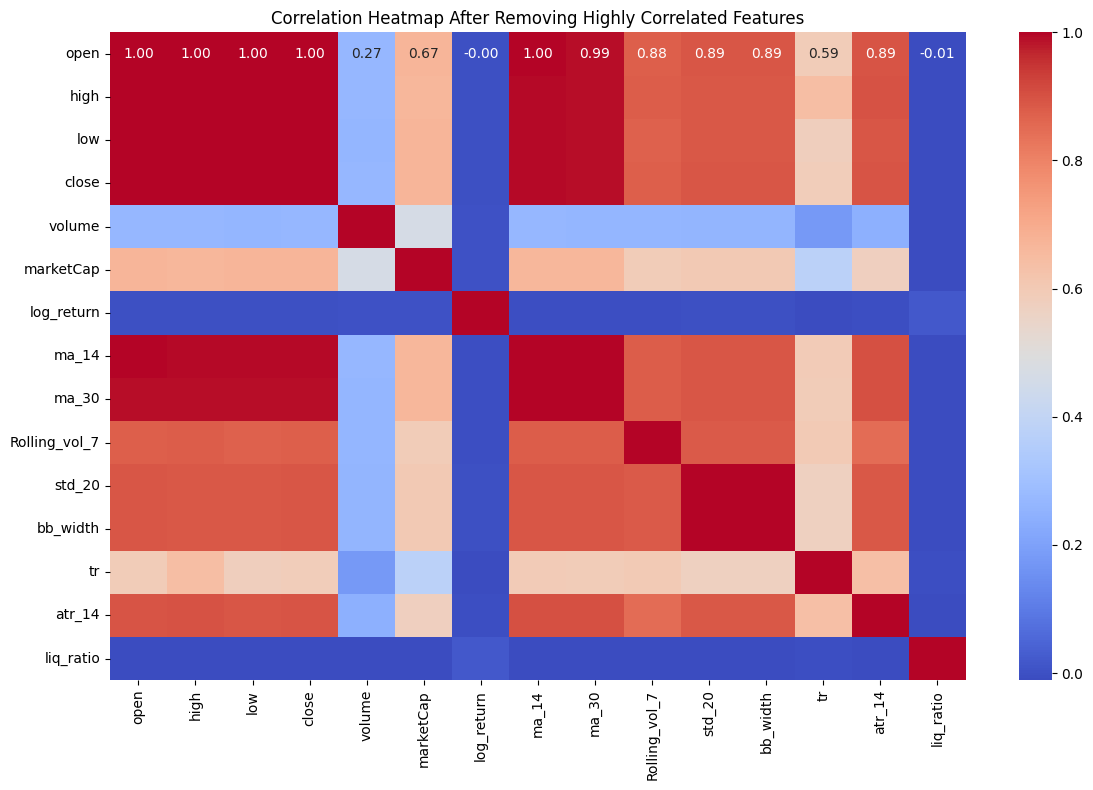

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use df_reduced or df_selected 
# Example: df_new = df_reduced
df_new = df_reduced     # ← change this if needed

# Select numeric columns only
num_df = df_new.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_new = num_df.corr()

# Plot new heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap After Removing Highly Correlated Features")
plt.tight_layout()
plt.show()

In [37]:
df_reduced.head()

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,log_return,ma_14,ma_30,Rolling_vol_7,std_20,bb_width,tr,atr_14,liq_ratio,bb_overbought,bb_oversold
0,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06,-0.031640,114.105003,114.105003,2.552656,2.552656,10.210624,18.023003,14.840004,0.0,True,False
1,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06,-0.063116,3.481070,3.481070,0.155309,0.155309,0.621236,0.665000,0.505700,0.0,True,False
2,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07,-0.007149,113.236669,113.236669,2.349477,2.349477,9.397906,15.744003,15.141337,0.0,True,False
3,3.370870,3.406720,2.939790,3.332740,0.0,5.805127e+07,2013-05-07T23:59:59.999Z,Litecoin,2013-05-07,-0.011489,3.431627,3.431627,0.139264,0.139264,0.557054,0.466930,0.492777,0.0,True,False
4,3.283620,3.491120,3.283620,3.409240,0.0,5.950822e+07,2013-05-08T23:59:59.999Z,Litecoin,2013-05-08,0.022695,3.426030,3.426030,0.114258,0.114258,0.457031,0.207500,0.421457,0.0,True,False


In [38]:
# Convert to datetime
df_reduced["date"] = pd.to_datetime(df_reduced["date"])

# Extract features
df_reduced["Day"] = df_reduced["date"].dt.day
df_reduced["Month"] = df_reduced["date"].dt.month
df_reduced["Year"] = df_reduced["date"].dt.year

# Optional: remove raw date column (recommended for ML)
df_reduced = df_reduced.drop(columns=["date"])

In [39]:
df_reduced = df_reduced.drop(columns=["timestamp"], errors="ignore")

# Final conclusion


### Bitcoin and Bitcoin-linked assets dominate volatility

### Ethereum exhibits dynamic, event-driven volatility

### Altcoins are relatively stable compared to BTC/ETH

### Stablecoins maintain expected near-zero volatility

### Volatility does not correlate with market cap

### Volatility metrics themselves are highly correlated, requiring careful feature selection

### The market displays a strong power-law distribution, where a handful of assets generate most volatility

### ATR-14 is an effective measure for distinguishing high-risk and low-risk assets

---

### Time-Based Insights 

* Major volatility spikes occurred during 2017–18 and 2020–21, showing strong time-dependent market cycles.
* Bitcoin consistently showed the highest volatility over time, while Ethereum’s volatility increased significantly after 2020.
* Most altcoins remained comparatively stable across the timeline, with only minor spikes during market-wide events.
* Stablecoins maintained near-zero volatility throughout, confirming their stability during high-volatility periods.

---

# Model Testing

In [40]:
df_reduced.to_csv("reduced_dataset1.csv", index=False, encoding="utf-8")

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import numpy as np

In [42]:
freq = df_reduced["crypto_name"].value_counts()
df_reduced["crypto_name_encoded"] = df_reduced["crypto_name"].map(freq)
df_reduced = df_reduced.drop(columns=["crypto_name"])

In [43]:
df_reduced

,open,high,low,close,volume,marketCap,log_return,ma_14,ma_30,Rolling_vol_7,...,bb_width,tr,atr_14,liq_ratio,bb_overbought,bb_oversold,Day,Month,Year,crypto_name_encoded
0,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,-0.031640,114.105003,114.105003,2.552656,...,10.210624,18.023003,14.840004,0.000000,True,False,6,5,2013,3247
1,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,-0.063116,3.481070,3.481070,0.155309,...,0.621236,0.665000,0.505700,0.000000,True,False,6,5,2013,3247
2,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,-0.007149,113.236669,113.236669,2.349477,...,9.397906,15.744003,15.141337,0.000000,True,False,7,5,2013,3247
3,3.370870,3.406720,2.939790,3.332740,0.000000e+00,5.805127e+07,-0.011489,3.431627,3.431627,0.139264,...,0.557054,0.466930,0.492777,0.000000,True,False,7,5,2013,3247
4,3.283620,3.491120,3.283620,3.409240,0.000000e+00,5.950822e+07,0.022695,3.426030,3.426030,0.114258,...,0.457031,0.207500,0.421457,0.000000,True,False,8,5,2013,3247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72885,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,-0.005852,0.023906,0.025128,0.000276,...,0.013463,0.000791,0.001340,0.024442,True,False,23,10,2022,1331
72886,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,0.013281,1.796991,1.904028,0.081910,...,1.800986,0.095049,0.194393,0.018084,True,False,23,10,2022,434
72887,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,-0.006987,5.773107,6.323609,0.208484,...,5.268069,0.207805,0.484352,0.068577,True,False,23,10,2022,1564
72888,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,-0.095587,0.000260,0.000177,0.000048,...,0.000445,0.000037,0.000077,0.135969,False,False,23,10,2022,974


In [45]:
from sklearn.model_selection import train_test_split
X = df_reduced.drop("atr_14", axis=1)
y = df_reduced["atr_14"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (58312, 20)
X_test shape: (14578, 20)
y_train shape: (58312,)
y_test shape: (14578,)


In [47]:
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
df_reduced.shape

(72890, 21)

In [50]:
df_reduced

,open,high,low,close,volume,marketCap,log_return,ma_14,ma_30,Rolling_vol_7,...,bb_width,tr,atr_14,liq_ratio,bb_overbought,bb_oversold,Day,Month,Year,crypto_name_encoded
0,115.980003,124.663002,106.639999,112.300003,0.000000e+00,1.249023e+09,-0.031640,114.105003,114.105003,2.552656,...,10.210624,18.023003,14.840004,0.000000,True,False,6,5,2013,3247
1,3.594220,3.781020,3.116020,3.371250,0.000000e+00,5.859436e+07,-0.063116,3.481070,3.481070,0.155309,...,0.621236,0.665000,0.505700,0.000000,True,False,6,5,2013,3247
2,112.250000,113.444000,97.699997,111.500000,0.000000e+00,1.240594e+09,-0.007149,113.236669,113.236669,2.349477,...,9.397906,15.744003,15.141337,0.000000,True,False,7,5,2013,3247
3,3.370870,3.406720,2.939790,3.332740,0.000000e+00,5.805127e+07,-0.011489,3.431627,3.431627,0.139264,...,0.557054,0.466930,0.492777,0.000000,True,False,7,5,2013,3247
4,3.283620,3.491120,3.283620,3.409240,0.000000e+00,5.950822e+07,0.022695,3.426030,3.426030,0.114258,...,0.457031,0.207500,0.421457,0.000000,True,False,8,5,2013,3247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72885,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,-0.005852,0.023906,0.025128,0.000276,...,0.013463,0.000791,0.001340,0.024442,True,False,23,10,2022,1331
72886,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,0.013281,1.796991,1.904028,0.081910,...,1.800986,0.095049,0.194393,0.018084,True,False,23,10,2022,434
72887,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,-0.006987,5.773107,6.323609,0.208484,...,5.268069,0.207805,0.484352,0.068577,True,False,23,10,2022,1564
72888,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,-0.095587,0.000260,0.000177,0.000048,...,0.000445,0.000037,0.000077,0.135969,False,False,23,10,2022,974


In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVM (SVR)": SVR(),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror")}

In [52]:
results = []

In [53]:
for name , model in models.items():
    print(f"Training: {name}")
    model.fit(X_train_scaled , y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test ,  y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
print("\n\n===== FINAL MODEL PERFORMANCE =====\n")
print(results_df)

Training: Linear Regression
Training: Lasso
Training: Ridge
Training: Decision Tree
Training: Random Forest
Training: SVM (SVR)
Training: XGBoost


===== FINAL MODEL PERFORMANCE =====

               Model        MAE        RMSE  R2 Score
0  Linear Regression  13.816700   94.112038  0.907804
1              Lasso  13.797000   94.569554  0.906905
2              Ridge  13.845195   94.179057  0.907672
3      Decision Tree   3.419745   33.456235  0.988349
4      Random Forest   3.264929   31.503773  0.989669
5          SVM (SVR)  35.618842  293.323905  0.104390
6            XGBoost   4.533275   29.495274  0.990944


## XGBoost performed best so final model -  XGBoost 

# Final Model Testing with selected features 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("dataset.csv")

# Remove Unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Convert date
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["crypto_name", "date"]).reset_index(drop=True)

In [2]:
import numpy as np
import pandas as pd

# Make sure date is in correct format
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Sort properly (multi-crypto safe)
df = df.sort_values(["crypto_name", "date"]).reset_index(drop=True)

# ------------------------------
# 1️⃣ Previous close
# ------------------------------
df["prev_close"] = df.groupby("crypto_name")["close"].shift(1)

# ------------------------------
# 2️⃣ True Range (TR)
# ------------------------------
df["h_l"]  = df["high"] - df["low"]
df["h_pc"] = (df["high"] - df["prev_close"]).abs()
df["l_pc"] = (df["low"]  - df["prev_close"]).abs()

df["tr"] = df[["h_l", "h_pc", "l_pc"]].max(axis=1)

# ------------------------------
# 3️⃣ ATR-14 (Rolling 14-day volatility)
# ------------------------------
df["atr_14"] = (
    df.groupby("crypto_name")["tr"]
      .transform(lambda x: x.rolling(window=14, min_periods=14).mean())
)

# ------------------------------
# 4️⃣ Log Returns
# ------------------------------
df["log_return"] = np.log(df["close"] / df["prev_close"])

# ------------------------------
# 5️⃣ Clean up helper columns
# ------------------------------
df.drop(columns=["prev_close", "h_l", "h_pc", "l_pc"], inplace=True)

# Check first rows
df.head()


,open,high,low,close,volume,marketCap,timestamp,crypto_name,date,tr,atr_14,log_return
0,0.000000,0.516571,0.000000,0.516571,0.000000,0.000000e+00,2020-10-02T23:59:59.999Z,Aave,2020-10-02,0.516571,NaN,NaN
1,0.523836,65.305938,0.523801,53.151488,0.000000,0.000000e+00,2020-10-03T23:59:59.999Z,Aave,2020-10-03,64.789367,NaN,4.633688
2,53.179858,55.070355,50.688990,52.675035,0.000000,0.000000e+00,2020-10-04T23:59:59.999Z,Aave,2020-10-04,4.381366,NaN,-0.009004
3,52.675035,55.112358,49.787900,53.219243,0.000000,8.912813e+07,2020-10-05T23:59:59.999Z,Aave,2020-10-05,5.324459,NaN,0.010278
4,53.291969,53.402270,40.734578,42.401599,583091.459763,7.101144e+07,2020-10-06T23:59:59.999Z,Aave,2020-10-06,12.667692,NaN,-0.227234


In [3]:
df["crypto_name_encoded"] = df["crypto_name"].astype("category").cat.codes

In [4]:
# Convert date to datetime if not converted already
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Create Day, Month, Year columns
df["Day"] = df["date"].dt.day
df["Month"] = df["date"].dt.month
df["Year"] = df["date"].dt.year

In [5]:
epsilon = 1e-9  # avoid log(0) # Handling outliers in atr_14

df["target"] = np.log(df.groupby("crypto_name")["atr_14"].shift(-1) + epsilon)

df = df.dropna(subset=["target"]).reset_index(drop=True)
df = df.drop(columns=["date"])
df = df.drop(columns=["timestamp"], errors="ignore")

In [8]:
for col in ["crypto_name", "atr_14"]:
    if col in df.columns:
        df = df.drop(columns=[col])

In [9]:
df

,open,high,low,close,volume,marketCap,tr,log_return,crypto_name_encoded,Day,Month,Year,target
0,51.372899,57.853946,49.629529,51.316518,3.132405e+06,2.582744e+08,8.224417,0.003752,0,14,10,2020,2.329910
1,51.387610,52.080685,44.018325,44.019183,5.883146e+06,2.215471e+08,8.062360,-0.153387,0,15,10,2020,2.359761
2,42.890607,43.906730,39.142957,39.495844,5.285520e+07,3.650715e+08,4.876226,-0.108430,0,16,10,2020,1.837055
3,39.486192,43.077373,38.633613,41.366993,4.333969e+07,3.823670e+08,4.443760,0.046288,0,17,10,2020,1.812132
4,41.389598,41.749488,39.531586,40.746972,4.044116e+07,3.766360e+08,2.217901,-0.015102,0,18,10,2020,1.808853
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72225,0.358337,0.391495,0.341762,0.387073,2.788638e+09,1.929512e+10,0.049732,0.077179,55,19,9,2022,-3.547112
72226,0.488732,0.518314,0.478734,0.492627,3.422192e+09,2.455686e+10,0.131241,0.241139,55,25,9,2022,-3.469878
72227,0.475119,0.477434,0.448158,0.448850,1.524149e+09,2.239791e+10,0.044470,-0.093064,55,2,10,2022,-3.306117
72228,0.517149,0.541416,0.508167,0.534061,1.789207e+09,2.662750e+10,0.092566,0.173821,55,9,10,2022,-3.221303


In [7]:
df.to_csv("feature_engineered_data.csv", index=False)

print("✔ File generated: feature_engineered_data.csv")


✔ File generated: feature_engineered_data.csv


In [64]:
numeric_features = [
    "open", "high", "low", "close",
    "volume", "marketCap",
    "tr",
    "log_return",
    "Day", "Month", "Year",
    "crypto_name_encoded"
]

X = df[numeric_features]
y = df["target"]


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [73]:
X_train

,open,high,low,close,volume,marketCap,tr,log_return,Day,Month,Year,crypto_name_encoded
0,51.372899,57.853946,49.629529,51.316518,3.132405e+06,2.582744e+08,8.224417,0.003752,14,10,2020,0
1,51.387610,52.080685,44.018325,44.019183,5.883146e+06,2.215471e+08,8.062360,-0.153387,15,10,2020,0
2,42.890607,43.906730,39.142957,39.495844,5.285520e+07,3.650715e+08,4.876226,-0.108430,16,10,2020,0
3,39.486192,43.077373,38.633613,41.366993,4.333969e+07,3.823670e+08,4.443760,0.046288,17,10,2020,0
4,41.389598,41.749488,39.531586,40.746972,4.044116e+07,3.766360e+08,2.217901,-0.015102,18,10,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...
57691,1.000000,1.000000,1.000000,1.000000,2.274910e+05,4.516000e+05,0.000000,0.000000,29,10,2015,45
57692,1.000000,1.000000,1.000000,1.000000,2.690910e+04,4.516000e+05,0.000000,0.000000,30,10,2015,45
57693,1.000000,1.000000,1.000000,1.000000,2.636730e+04,4.516000e+05,0.000000,0.000000,31,10,2015,45
57694,1.000000,1.000000,1.000000,1.000000,4.505600e+03,4.516000e+05,0.000000,0.000000,1,11,2015,45


In [66]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None
,feature_types,None


In [67]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
print("Test RMSE (log-target):", rmse)



Test RMSE (log-target): 3.8498927370009635


# Cross- validation

In [68]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(
    model, X, y,
    cv=tscv,
    scoring="neg_mean_squared_error"
)

rmse_scores = np.sqrt(-scores)
print("TSS CV RMSE (log-target):", rmse_scores)
print("Average RMSE:", rmse_scores.mean())


TSS CV RMSE (log-target): [2.22756309 0.42535474 0.51748487 2.93570322 0.52430126]
Average RMSE: 1.3260814347803087


# Hyperparameter Tunning

In [69]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [200, 300, 400, 600],
    "learning_rate": [0.01, 0.03, 0.05],
    "max_depth": [4, 5, 6, 7],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=20,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Best Params:", search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Params: {'subsample': 0.7, 'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


In [70]:
next_day_input = df[numeric_features].tail(1)
next_day_log_atr = best_model.predict(next_day_input)
next_day_atr = np.exp(next_day_log_atr)
next_day_atr

array([0.00018871], dtype=float32)

# Final Model Training with relevant target variable


===== FINAL MODEL PERFORMANCE =====
Test RMSE (log scale):     3.5765091393697133
Test RMSE (original scale): 341.1120175262803
Test MAE:                   39.070638405025825
R² Score:                   0.674816397311558


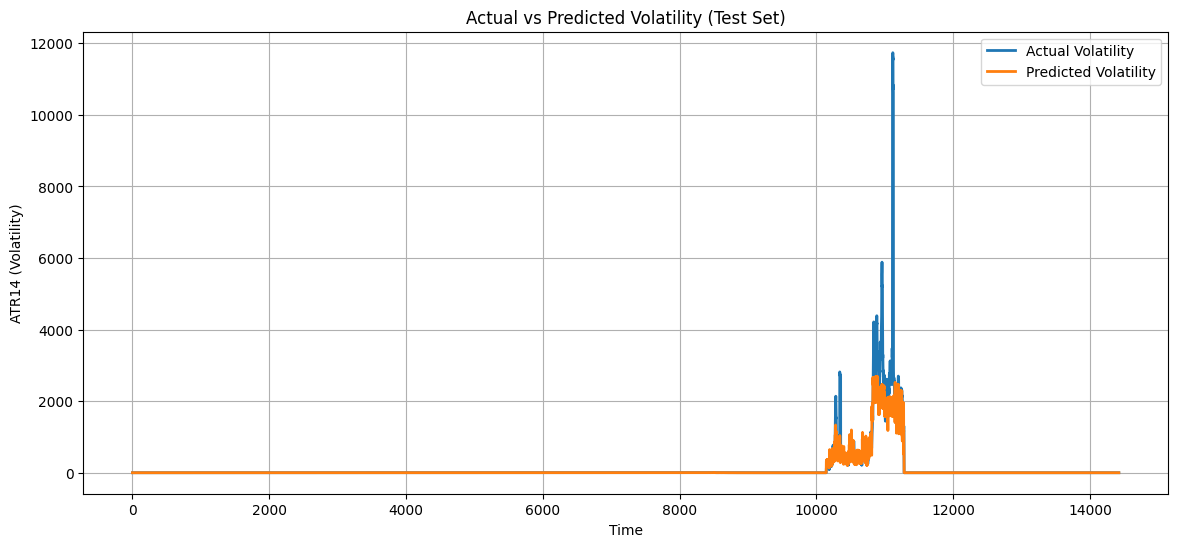

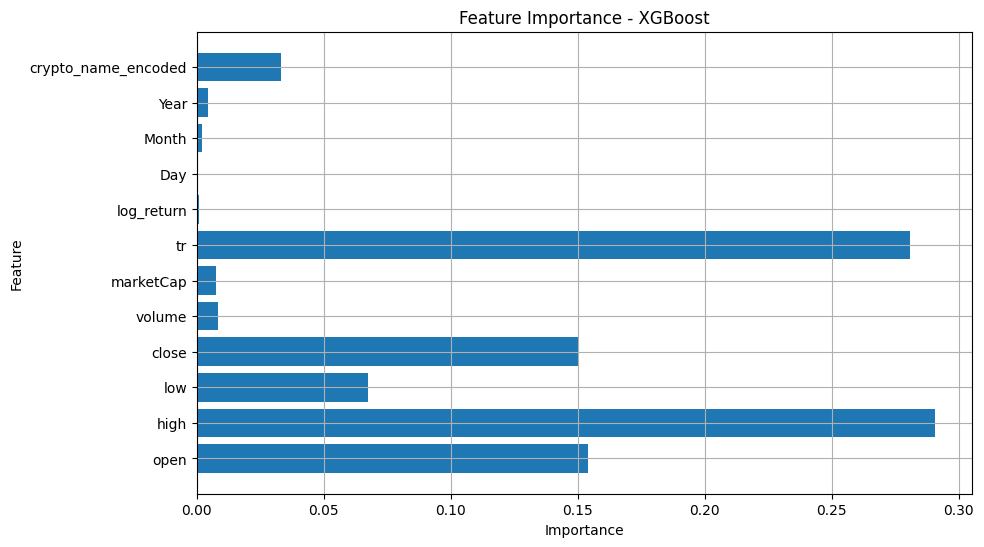


Model saved as xgb_volatility_model.pkl


In [74]:
# ==========================================
#  📌 FINAL XGBOOST MODEL (LOG ATR-14 TARGET)
# ==========================================

import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import pickle

# ---------------------------------------------------
# 1️⃣ Final Tuned Model (Use your best hyperparameters)
# ---------------------------------------------------

model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.01,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.6,
    tree_method="hist",
    random_state=42
)

# ---------------------------------------------------
# 2️⃣ Fit on full training data
# ---------------------------------------------------

model.fit(X_train, y_train)  # y_train = log(ATR14)

# ---------------------------------------------------
# 3️⃣ Predict on Test Data
# ---------------------------------------------------

y_pred_log = model.predict(X_test)

# If your target = log1p(ATR14)
y_pred = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# ---------------------------------------------------
# 4️⃣ Final Evaluation (Test metrics)
# ---------------------------------------------------

rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
rmse_original = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

print("\n===== FINAL MODEL PERFORMANCE =====")
print(f"Test RMSE (log scale):     {rmse_log}")
print(f"Test RMSE (original scale): {rmse_original}")
print(f"Test MAE:                   {mae}")
print(f"R² Score:                   {r2}")

# ---------------------------------------------------
# 5️⃣ Actual vs Predicted Plot
# ---------------------------------------------------

plt.figure(figsize=(14,6))
plt.plot(y_test_actual.values, label="Actual Volatility", linewidth=2)
plt.plot(y_pred, label="Predicted Volatility", linewidth=2)
plt.title("Actual vs Predicted Volatility (Test Set)")
plt.xlabel("Time")
plt.ylabel("ATR14 (Volatility)")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 6️⃣ Feature Importance Plot
# ---------------------------------------------------

plt.figure(figsize=(10,6))
plt.barh(X_train.columns, model.feature_importances_)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

# ---------------------------------------------------
# 7️⃣ Save the Model for Deployment
# ---------------------------------------------------

pickle.dump(model, open("xgb_volatility_model.pkl", "wb"))
print("\nModel saved as xgb_volatility_model.pkl")
